<a href="https://colab.research.google.com/github/senura20220685-oss/CRM-coursework/blob/main/Correct_CRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38618 sha256=689b88398334b4058ee3e88b1d6de3ad5c633587ab61cc94b092b1641ca0b88b
  Stored in directory: /root/.cache/pip/wheels/b0/e1/ca/e683b02e57db550881c8ebb89ba3eccb7a5c0ebfad7f03acea
Successfully built yahoofinancials


In [4]:
import pandas as pd
import requests

# URL of the S&P 500 companies list on Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Add a User-Agent header to simulate a browser request
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

# Send a GET request to retrieve the HTML content from the URL with the custom header
response = requests.get(url, headers=headers)

# Extract all tables from the HTML content of the response
tables = pd.read_html(response.text)

# The S&P 500 table is the second table in the list (index 1)
sp500_table = tables[1]

# Extract and clean the 'Symbol' column to get the ticker symbols (replace periods with hyphens)
tickers = sp500_table["Symbol"].str.replace('.', '-', regex=False).tolist()

# Display the first 10 tickers for preview
tickers[:10]


/tmp/ipython-input-232343964.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [5]:
import yfinance as yf
from datetime import datetime

# Define the start and end dates for the data retrieval period
start_date = '2022-01-01'
end_date = '2025-01-01'


# Step 2: Download historical data for all tickers and organize it by ticker symbol
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)

# Display the basic structure of the downloaded data
print("Data shape:", data.shape)
data.head()

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['SOLS', 'Q']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')


Data shape: (753, 3018)


Ticker            JBHT                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2022-01-03  205.000000  206.520004  200.429993  201.839996  194.125580   
2022-01-04  203.059998  208.869995  201.929993  207.660004  199.723129   
2022-01-05  207.309998  208.740005  202.539993  203.360001  195.587524   
2022-01-06  203.779999  204.830002  199.029999  201.949997  194.231339   
2022-01-07  201.690002  201.690002  197.399994  200.110001  192.461761   

Ticker                    RCL                                   ...  \
Price       Volume       Open       High        Low      Close  ...   
Date                                                            ...   
2022-01-03  490900  77.570000  81.750000  77.570000  80.830002  ...   
2022-01-04  691500  82.230003  83.529999  81.730003  82.379997  ...   
2022-01-05  582700  84.000000  84.000000  79.910004  80.610001  ...   
2022-01-06  495100  81.339996  82.870003  77.470001  77.919998  ...   
2022-01-07  522800  78.790001  82.500000  78.400002  81.019997  ...   

Ticker             MU                                         ESS              \
Price             Low      Close  Adj Close    Volume        Open        High   
Date                                                                            
2022-01-03  93.480003  95.750000  93.691147  18705500  352.890015  354.450012   
2022-01-04  93.540001  96.339996  94.268448  19725000  355.410004  359.489990   
2022-01-05  94.349998  94.400002  92.370178  28613100  355.559998  356.450012   
2022-01-06  94.120003  95.650002  93.593307  22320300  351.779999  353.070007   
2022-01-07  93.940002  94.449997  92.419090  14857900  347.160004  348.850006   

Ticker                                                  
Price              Low       Close   Adj Close  Volume  
Date                                                    
2022-01-03  345.170013  353.859985  307.915802  317000  
2022-01-04  353.869995  356.630005  310.326111  387700  
2022-01-05  349.170013  349.329987  303.973938  333400  
2022-01-06  348.079987  348.950012  303.643280  184700  
2022-01-07  344.179993  344.309998  299.605804  264600  

[5 rows x 3018 columns]

In [6]:
# Extract 'Close' price data from the multi-index DataFrame
close_prices = data.xs('Close', level='Price', axis=1)

# Remove tickers more than 20% missing data
threshold = 0.8 * len(close_prices)
clean_data = close_prices.dropna(axis=1, thresh=threshold)

# Optionally, fill the remaining missing values using forward fill and backward fill methods
clean_data = clean_data.fillna(method='ffill').fillna(method='bfill')

# Display the shape of the cleaned data to verify the cleaning process
print("After cleaning:", clean_data.shape)

# The original 'tickers' list may still include tickers with missing data from the initial scrape.
# To track which tickers were removed due to missing data, compare the colums of the cleaned
# data to the columns of the initial close_prices DataFrame.
print("Removed tickers due to missing data:", len(close_prices.columns) - clean_data.shape[1])

After cleaning: (753, 496)
Removed tickers due to missing data: 7


/tmp/ipython-input-4116887914.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clean_data = clean_data.fillna(method='ffill').fillna(method='bfill')


Task 02

In [7]:
import numpy as np
import pandas as pd

# 'clean_data' is the DataFrame with the cleaned daily closing prices (from Step 1)
# Columns represent stock tickers, and rows correspond to dates

# Step 1: Compute the daily returns for each stock by calculating the percentage change
daily_returns = clean_data.pct_change().dropna()

# Display the first few rows of the daily returns DataFrame
daily_returns.head()

Ticker,JBHT,RCL,CHTR,HBAN,COF,ON,GEN,PAYX,GL,CHRW,...,HII,FFIV,LDOS,PFE,EXPD,XYZ,FITB,TROW,MU,ESS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.028835,0.019176,-0.010516,0.037975,0.018943,0.011116,0.008355,-0.001933,0.025806,0.022984,...,0.018544,-0.011740,0.017948,-0.037423,-0.005581,-0.046943,0.042534,0.002775,0.006162,0.007828
2022-01-05,-0.020707,-0.021486,-0.024830,0.001220,-0.019120,-0.049753,-0.013183,-0.019069,0.000513,-0.006523,...,-0.013193,-0.031638,-0.003483,0.020172,-0.002999,-0.082134,-0.003006,-0.039155,-0.020137,-0.020469
2022-01-06,-0.006934,-0.033371,0.011347,0.037150,0.016660,-0.002521,0.032824,-0.006758,0.015907,0.011764,...,0.019306,0.014593,-0.006444,-0.014201,0.002159,0.008154,0.041783,0.013548,0.013242,-0.001088
2022-01-07,-0.009111,0.039784,-0.033958,0.011157,0.026272,-0.040000,-0.016630,-0.014985,0.017477,-0.022713,...,0.012382,-0.015910,0.005936,0.016047,-0.014159,-0.021568,0.008890,0.008210,-0.012546,-0.013297
2022-01-10,-0.010644,-0.013577,-0.008288,-0.011034,0.015903,0.008674,0.009019,-0.017541,0.002879,-0.005441,...,0.016791,0.023238,-0.019670,0.009332,-0.026071,0.020772,0.000000,-0.012371,-0.005929,0.002062


In [8]:

market_data = yf.download('^GSPC', start='2022-01-01', end='2025-01-01')
market_returns = market_data['Close'].pct_change().dropna()

# Calculate beta for each stock
beta_values = {}

for ticker in daily_returns.columns:
    stock_returns = daily_returns[ticker].dropna()

    # Align dates with market data
    aligned = pd.concat([stock_returns, market_returns], axis=1).dropna()
    stock_r, market_r = aligned.iloc[:, 0], aligned.iloc[:, 1]

    corr = stock_r.corr(market_r)
    stock_std = stock_r.std()
    market_std = market_r.std()

    beta = corr * (stock_std / market_std)
    beta_values[ticker] = beta

# Create DataFrame
beta_df = pd.DataFrame(list(beta_values.items()), columns=['Ticker', 'Beta'])
beta_df.sort_values(by='Beta', ascending=False).head(10)


/tmp/ipython-input-1160302907.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market_data = yf.download('^GSPC', start='2022-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


,Ticker,Beta
463,COIN,2.960959
491,XYZ,2.544784
221,NVDA,2.268392
18,APP,2.261933
114,TTD,2.237123
249,PLTR,2.189588
113,MPWR,2.133868
460,AMD,2.064749
107,DASH,2.004918
96,HOOD,1.984828


In [9]:
# Calculate the daily volatility for each stock
daily_volatility = daily_returns.std()

# convert the daily volatility to annual volatility by multiplying by multiplying by the square root of 252 (the number of trading days in a year)
annual_volatility = daily_volatility * np.sqrt(252)

# Create a DataFrame to store the calculated volatility values
volatility_df = pd.DataFrame({
    'Ticker': daily_returns.columns,  # Stock tickers
    'Daily Volatility': daily_volatility.values,  # Daily volatility for each stock
    'Annual Volatility': annual_volatility.values  # Annualized volatility for each stock
})

# Sort the volatility values in descending order and display the top 10 stocks with the highest annual volatility
volatility_df.sort_values(by='Annual Volatility', ascending=False).head(10)

,Ticker,Daily Volatility,Annual Volatility
463,COIN,0.060087,0.953848
46,SMCI,0.056818,0.901957
18,APP,0.049663,0.788374
249,PLTR,0.043525,0.690932
491,XYZ,0.041187,0.653825
96,HOOD,0.041057,0.651759
114,TTD,0.040799,0.647665
254,TSLA,0.038618,0.613038
428,MRNA,0.038024,0.603608
272,EPAM,0.037945,0.602363


Task 03

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [11]:
# Reconstruct metrics_df using only beta_df
metrics_df = beta_df  # Assuming beta_df already contains the relevant beta data

# Select the 'Beta' column for further analysis
X = metrics_df[['Beta']]

# Standardize the Beta values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


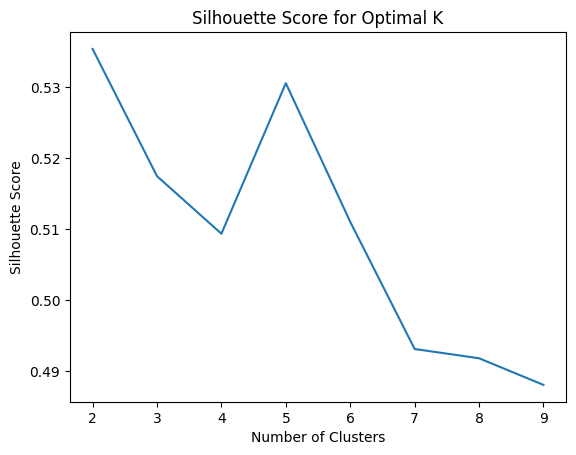

In [12]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt



silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    agglom = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglom.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for different K values
plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

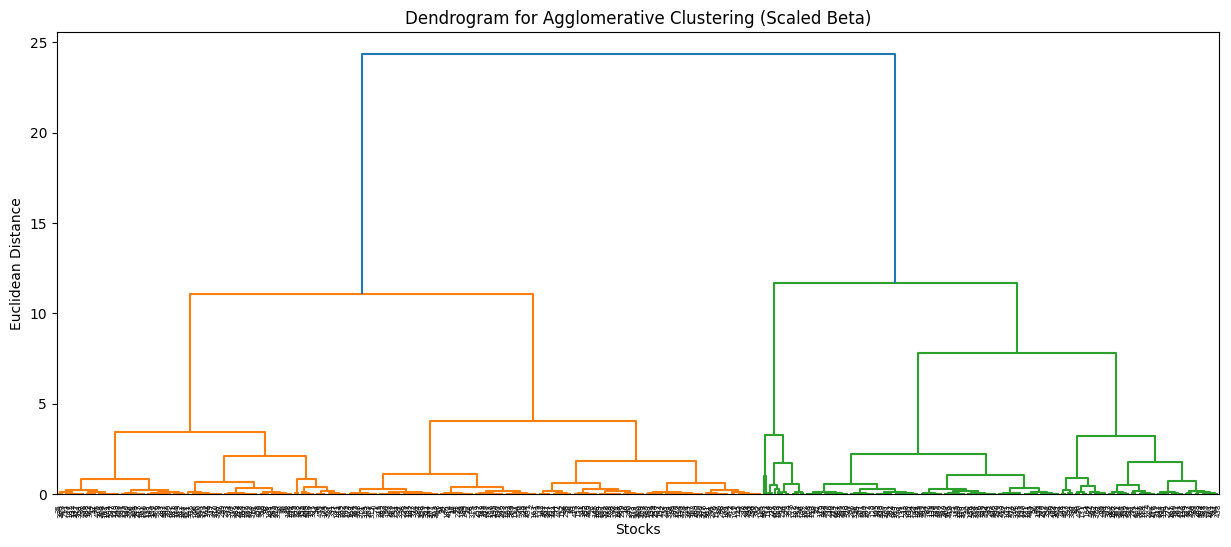

In [13]:
plt.figure(figsize=(15, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled[:, 0].reshape(-1, 1), method='ward'))
plt.title("Dendrogram for Agglomerative Clustering (Scaled Beta)")
plt.xlabel("Stocks")
plt.ylabel("Euclidean Distance")
plt.show()

In [14]:
# Perform Agglomerative Clustering with K=3 (as identified using silhouette score and dendrogram)
optimal_n_clusters = 3
agg = AgglomerativeClustering(n_clusters=optimal_n_clusters, metric='euclidean', linkage='ward')
metrics_df['Cluster'] = agg.fit_predict(X_scaled)

# Display the first few rows with the cluster labels
print(metrics_df.head())

  Ticker      Beta  Cluster
0   JBHT  0.939265        0
1    RCL  1.651227        1
2   CHTR  0.923548        0
3   HBAN  1.051084        1
4    COF  1.287125        1


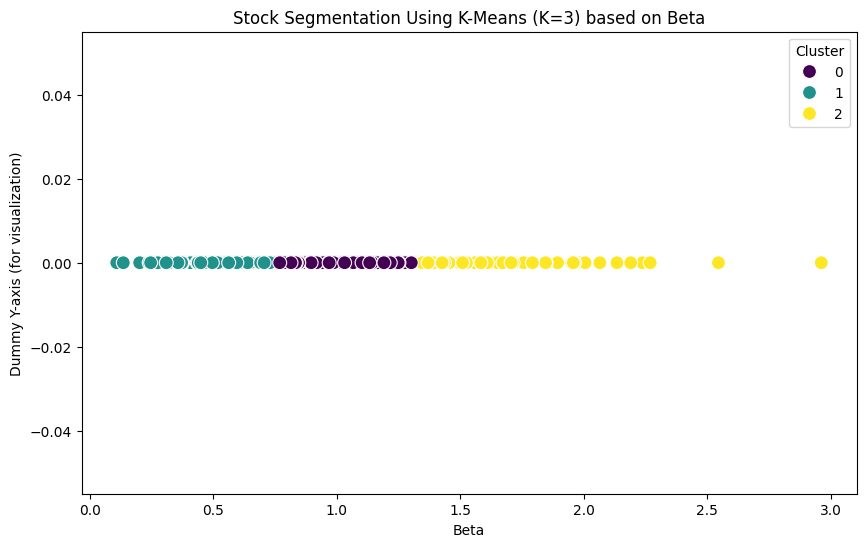

Cluster Profiles Based on Beta:
             mean       std
Cluster                    
0        1.004537  0.146416
1        0.519065  0.149517
2        1.654280  0.309408


In [15]:
# Apply K-Means clustering with the optimal number of clusters (K=3 in this case)
from sklearn.cluster import KMeans

optimal_n_clusters = 3  # The optimal number of clusters determined eariler using Elbow and Siluhouette methods
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
metrics_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (Only using Beta for the x-axis)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Beta', y=[0] * len(metrics_df), hue='Cluster', data=metrics_df, palette='viridis', s=100)
plt.title(f'Stock Segmentation Using K-Means (K={optimal_n_clusters}) based on Beta')
plt.xlabel('Beta')
plt.ylabel('Dummy Y-axis (for visualization)')
plt.legend(title='Cluster')
plt.show()

# Cluster profiling
cluster_profiles = metrics_df.groupby('Cluster')['Beta'].agg(['mean', 'std'])
print("Cluster Profiles Based on Beta:")
print(cluster_profiles)

Task 04

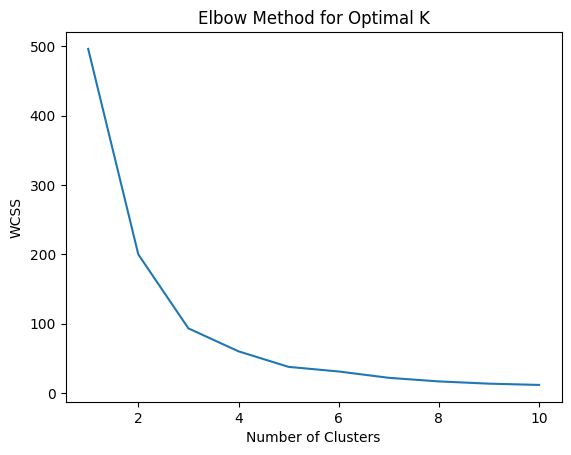

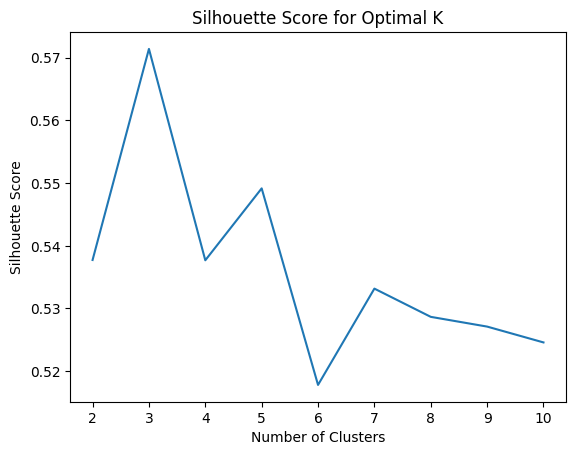

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for k in range(1, 11):  # Testing K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # Added n_init to suppress warning
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

sil_scores = []
for k in range(2, 11):  # Silhouette score requires K ≥ 2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # Added n_init to suppress warning
    kmeans.fit(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

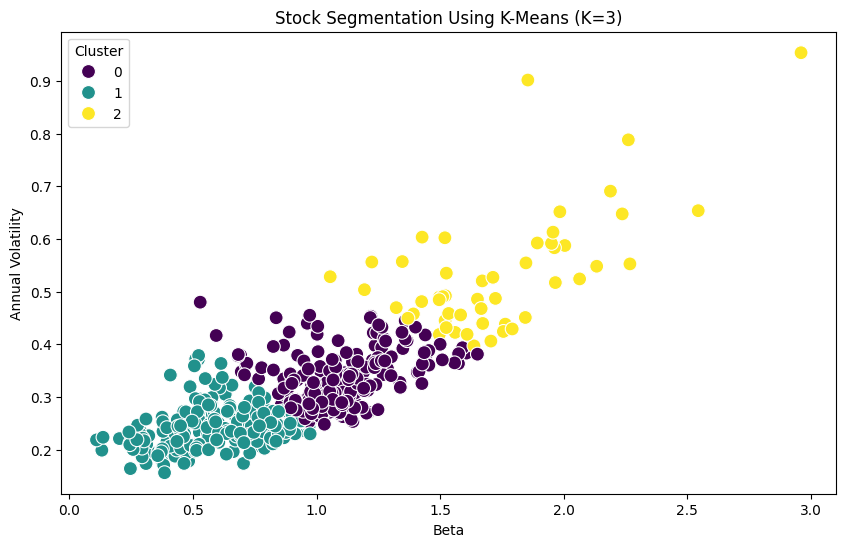

Cluster Profiles Based on Beta and Annual Volatility:
             Beta           Annual Volatility          
             mean       std              mean       std
Cluster                                                
0        1.092299  0.196501          0.332430  0.051108
1        0.603632  0.197635          0.241314  0.038689
2        1.732170  0.352642          0.532952  0.115112


In [17]:
# Load and preprocess the data (Beta and Annual Volatility)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Recreate metrics_df to include both Beta and Annual Volatility
# Assuming beta_df and volatility_df are available from previous steps
metrics_df = pd.merge(beta_df, volatility_df[['Ticker', 'Annual Volatility']], on='Ticker')

# Select the relevant features for clustering
features_for_clustering = metrics_df[['Beta', 'Annual Volatility']]

# Standardize the features
s_scaler = StandardScaler()
X_scaled_kmeans = s_scaler.fit_transform(features_for_clustering)

# Apply K-Means clustering with the optimal number of clusters (K=3 in this case)
optimal_n_clusters = 3  # This value was determined earlier using Elbow and Silhouette methods
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init='auto')
metrics_df['Cluster'] = kmeans.fit_predict(X_scaled_kmeans)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Beta', y='Annual Volatility', hue='Cluster', data=metrics_df, palette='viridis', s=100)
plt.title(f'Stock Segmentation Using K-Means (K={optimal_n_clusters})')
plt.xlabel('Beta')
plt.ylabel('Annual Volatility')
plt.legend(title='Cluster')
plt.show()

# Cluster profiling
cluster_profiles = metrics_df.groupby('Cluster')[['Beta', 'Annual Volatility']].agg(['mean', 'std'])
print("Cluster Profiles Based on Beta and Annual Volatility:")
print(cluster_profiles)

Task 05 b

In [18]:
# Cluster summary table (Beta & Volatility statistics)
cluster_summary = metrics_df.groupby('Cluster')[['Beta', 'Annual Volatility']].agg(['mean','std','min','max','count'])

print("Cluster Summary:")
print(cluster_summary.to_string())

Cluster Summary:
             Beta                                     Annual Volatility                                    
             mean       std       min       max count              mean       std       min       max count
Cluster                                                                                                    
0        1.092299  0.196501  0.529163  1.651205   216          0.332430  0.051108  0.248185  0.480009   216
1        0.603632  0.197635  0.109437  0.974059   229          0.241314  0.038689  0.156076  0.378766   229
2        1.732170  0.352642  1.055336  2.960959    51          0.532952  0.115112  0.396983  0.953848    51


In [19]:
# Calculate the mean daily return for each stock
avg_daily_return = daily_returns.mean()

# Merge the Avg_Daily_Return into the metrics_df DataFrame by matching on 'Ticker'
# The rename method converts the Series into a column to facilitate the merge
metrics_df = pd.merge(metrics_df, avg_daily_return.rename('Avg_Daily_Return'), on='Ticker', how='left')

# Calculate the average daily return at the cluster level using the 'Cluster' column from metrics_df
daily_ret_cluster = metrics_df.groupby('Cluster')['Avg_Daily_Return'].mean()
++
print("\nAverage Daily Return per Cluster:")
print(daily_ret_cluster.to_string())


Average Daily Return per Cluster:
Cluster
0    0.000355
1    0.000237
2    0.000672


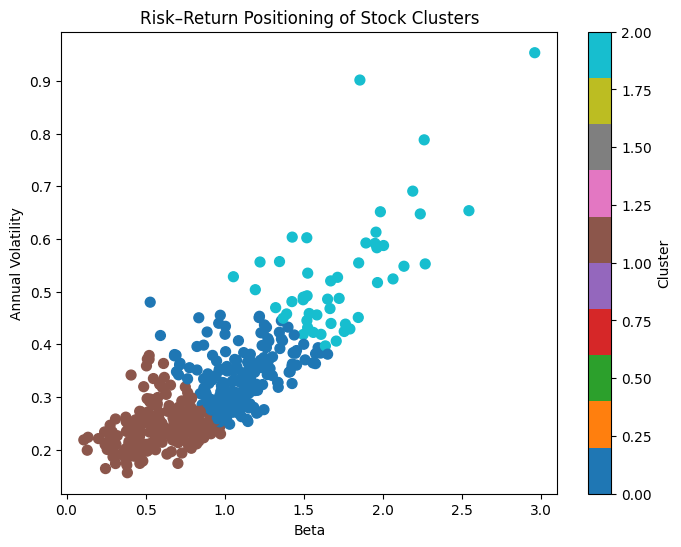

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(metrics_df['Beta'], metrics_df['Annual Volatility'],
            c=metrics_df['Cluster'], cmap='tab10', s=50)

plt.xlabel("Beta")
plt.ylabel("Annual Volatility")
plt.title("Risk–Return Positioning of Stock Clusters")
plt.colorbar(label='Cluster')
plt.show()